In [1]:
import pandas as pd
import os
from itables import show
import matplotlib.pyplot as plt

# Emission data Rudolf Müller Anlage (Darmstadt)

In [2]:
darmstadt = pd.read_csv('D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\Darmstadt.txt', sep=';')
darmstadt

,Datum,Zeit,Kohlenmonoxid (CO)[mg/m³],"PM2,5[µg/m³]",PM10[µg/m³],Stickstoffdioxid (NO₂)[µg/m³],Stickstoffmonoxid (NO)[µg/m³],Unnamed: 7
0,01.01.2018,00:30,"0,18",-,"112,9","21,4","6,3",NaN
1,01.01.2018,01:00,"0,16",-,"66,5","12,5","2,5",NaN
2,01.01.2018,01:30,"0,14",-,"31,2","6,4","1,6",NaN
3,01.01.2018,02:00,"0,15",-,"22,4","5,9","1,3",NaN
4,01.01.2018,02:30,"0,14",-,"24,4","5,2","1,3",NaN
...,...,...,...,...,...,...,...,...
100143,18.09.2023,08:00,-,"7,4","17,1","15,3","0,4",NaN
100144,18.09.2023,08:30,-,"7,5","17,8","13,6","0,8",NaN
100145,18.09.2023,09:00,-,"7,8","17,6","11,7","0,4",NaN
100146,18.09.2023,09:30,-,"7,2","18,8","12,2","0,9",NaN


In [12]:
darmstadt = pd.read_csv('D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\Darmstadt.txt', sep=';')
darmstadt['date'] = pd.to_datetime(darmstadt['Datum'], format='%d.%m.%Y')
darmstadt['Zeit'] = darmstadt['Zeit'].replace('24:00', '00:00')
darmstadt['Zeit'] = pd.to_datetime(darmstadt['Zeit'], format='%H:%M')
darmstadt['time'] = darmstadt['Zeit'].dt.time
darmstadt.drop(columns=['Datum', 'Zeit', 'Unnamed: 7'], inplace=True)
darmstadt.rename(columns = {'Benzol (C₆H₆)[µg/m³]' : 'Benzol', 'Kohlenmonoxid (CO)[mg/m³]' : 'CO', 'm-/p-Xylol (C₈H₁₀)[µg/m³]' : 'm-/p-Xylol', 'o-Xylol (C₈H₁₀)[µg/m³]' : 'o-Xylol', 'PM2,5[µg/m³]' : 'PM2,5', 'PM10[µg/m³]' : 'PM10','Toluol (C₇H₈)[µg/m³]' : 'Toluol', 'Stickstoffdioxid (NO₂)[µg/m³]' : 'NO2', 'Stickstoffmonoxid (NO)[µg/m³]' : 'NO'}, inplace= True)
darmstadt['location'] = 'rudolf-mueller-anlage'
#convert columns to numeric values
columns_to_convert = ['CO', 'PM2,5', 'PM10', 'NO2', 'NO']
for column in columns_to_convert:
    darmstadt[column] = darmstadt[column].str.replace(',', '.')
darmstadt[columns_to_convert] = darmstadt[columns_to_convert].apply(pd.to_numeric, errors='coerce')

darmstadt

,CO,"PM2,5",PM10,NO2,NO,date,time,location
0,0.18,NaN,112.9,21.4,6.3,2018-01-01,00:30:00,rudolf-mueller-anlage
1,0.16,NaN,66.5,12.5,2.5,2018-01-01,01:00:00,rudolf-mueller-anlage
2,0.14,NaN,31.2,6.4,1.6,2018-01-01,01:30:00,rudolf-mueller-anlage
3,0.15,NaN,22.4,5.9,1.3,2018-01-01,02:00:00,rudolf-mueller-anlage
4,0.14,NaN,24.4,5.2,1.3,2018-01-01,02:30:00,rudolf-mueller-anlage
...,...,...,...,...,...,...,...,...
100143,NaN,7.4,17.1,15.3,0.4,2023-09-18,08:00:00,rudolf-mueller-anlage
100144,NaN,7.5,17.8,13.6,0.8,2023-09-18,08:30:00,rudolf-mueller-anlage
100145,NaN,7.8,17.6,11.7,0.4,2023-09-18,09:00:00,rudolf-mueller-anlage
100146,NaN,7.2,18.8,12.2,0.9,2023-09-18,09:30:00,rudolf-mueller-anlage


# Emission data Hügelstraße

In [2]:
huegelstr = pd.read_csv('D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\Darmstadt Huegelstrasse.txt', sep=';')
huegelstr['date'] = pd.to_datetime(huegelstr['Datum'], format='%d.%m.%Y')
huegelstr['Zeit'] = huegelstr['Zeit'].replace('24:00', '00:00')
huegelstr['Zeit'] = pd.to_datetime(huegelstr['Zeit'], format='%H:%M')
huegelstr['time'] = huegelstr['Zeit'].dt.time
huegelstr.drop(columns=['Datum', 'Zeit', 'Unnamed: 11'], inplace=True)
huegelstr.rename(columns = {'Benzol (C₆H₆)[µg/m³]' : 'Benzol', 'Kohlenmonoxid (CO)[mg/m³]' : 'CO', 'm-/p-Xylol (C₈H₁₀)[µg/m³]' : 'm-/p-Xylol', 'o-Xylol (C₈H₁₀)[µg/m³]' : 'o-Xylol', 'PM2,5[µg/m³]' : 'PM2,5', 'PM10[µg/m³]' : 'PM10','Toluol (C₇H₈)[µg/m³]' : 'Toluol', 'Stickstoffdioxid (NO₂)[µg/m³]' : 'NO2', 'Stickstoffmonoxid (NO)[µg/m³]' : 'NO'}, inplace= True)
#convert columns to numeric values
columns_to_convert = ['Benzol', 'CO', 'm-/p-Xylol', 'o-Xylol', 'PM2,5', 'PM10', 'NO2', 'NO', 'Toluol']
for column in columns_to_convert:
    huegelstr[column] = huegelstr[column].str.replace(',', '.')
huegelstr[columns_to_convert] = huegelstr[columns_to_convert].apply(pd.to_numeric, errors='coerce')


huegelstr['location'] = 'huegelstr'
huegelstr


,Benzol,CO,m-/p-Xylol,o-Xylol,"PM2,5",PM10,NO2,NO,Toluol,date,time,location
0,1.15,0.31,0.22,0.22,NaN,337.4,32.2,34.0,0.45,2018-01-01,00:30:00,huegelstr
1,1.81,0.22,0.22,0.22,NaN,148.2,19.3,9.4,0.54,2018-01-01,01:00:00,huegelstr
2,0.84,0.16,0.22,0.22,NaN,29.2,11.5,3.8,0.49,2018-01-01,01:30:00,huegelstr
3,0.37,0.15,0.22,0.22,NaN,24.2,11.9,4.7,0.19,2018-01-01,02:00:00,huegelstr
4,0.33,0.18,0.22,0.22,NaN,23.4,15.2,7.2,0.19,2018-01-01,02:30:00,huegelstr
...,...,...,...,...,...,...,...,...,...,...,...,...
100143,0.24,NaN,2.05,1.04,8.3,18.7,17.6,3.6,1.08,2023-09-18,08:00:00,huegelstr
100144,0.34,NaN,0.89,0.22,8.1,18.7,23.5,16.7,2.85,2023-09-18,08:30:00,huegelstr
100145,0.19,NaN,0.76,0.51,8.3,20.1,19.9,10.6,1.31,2023-09-18,09:00:00,huegelstr
100146,0.29,NaN,0.76,0.22,7.3,17.1,18.1,7.1,2.40,2023-09-18,09:30:00,huegelstr


In [3]:
huegelstr['datetime'] = pd.to_datetime(huegelstr['date'].astype(str) + ' ' + huegelstr['time'].astype(str))

# Drop the 'date' and 'time' columns if you no longer need them
huegelstr.drop(columns=['date', 'time', 'location'], inplace=True)
huegelstr

In [5]:
huegelstr.to_csv('emission_huegelstr.csv', index = False)

# Emission data Hügelstraße 1

In [10]:
# Directory containing the CSV files
csv_directory = 'D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\Huegelstraße_I'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.txt')]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through the CSV files and concatenate them
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path, sep=';')
    merged_data = pd.concat([merged_data, df], ignore_index=True)

merged_data_huegelstr_1 = merged_data
merged_data_huegelstr_1['location'] = 'huegelstr_1'
merged_data_huegelstr_1 = merged_data_huegelstr_1.drop(columns=['Unnamed: 2'])
merged_data_huegelstr_1['Monat'] = merged_data_huegelstr_1['Monat'].astype('str')
merged_data_huegelstr_1['Monat'] = merged_data_huegelstr_1['Monat'].replace(to_replace = r'(\d{1,2})\.(\d{3})$', value= r"\g<1>.\g<2>0", regex = True)
merged_data_huegelstr_1['Monat'] = merged_data_huegelstr_1['Monat'].replace(to_replace = r'^(\d{1})\.(\d{4})', value= r'0\1.\2', regex = True)
merged_data_huegelstr_1['date'] = pd.to_datetime(merged_data_huegelstr_1['Monat'], format='%m.%Y')
merged_data_huegelstr_1.drop(columns = ['Monat'], inplace=True)
merged_data_huegelstr_1 = merged_data_huegelstr_1[merged_data_huegelstr_1['Stickstoffdioxid (NO₂)[µg/m³]'] != '-']
merged_data_huegelstr_1.rename(columns = {'Stickstoffdioxid (NO₂)[µg/m³]' : 'NO2'}, inplace= True)

#convert columns to numeric values
columns_to_convert = [ 'NO2']
for column in columns_to_convert:
    merged_data_huegelstr_1[column] = merged_data_huegelstr_1[column].str.replace(',', '.')
merged_data_huegelstr_1[columns_to_convert] = merged_data_huegelstr_1[columns_to_convert].apply(pd.to_numeric, errors='coerce')

merged_data_huegelstr_1.sample(15)



,NO2,location,date
8,68.6,huegelstr_1,2018-09-01
14,63.6,huegelstr_1,2019-03-01
52,40.4,huegelstr_1,2022-05-01
17,60.2,huegelstr_1,2019-06-01
33,40.6,huegelstr_1,2020-10-01
49,35.9,huegelstr_1,2022-02-01
65,35.3,huegelstr_1,2023-06-01
15,59.1,huegelstr_1,2019-04-01
53,43.3,huegelstr_1,2022-06-01
26,37.4,huegelstr_1,2020-03-01


# Emission data Heinrichstraße

In [11]:
# Directory containing the CSV files
csv_directory = 'D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\Heinrichstraße'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.txt')]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through the CSV files and concatenate them
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    df = pd.read_csv(file_path, sep=';')
    merged_data = pd.concat([merged_data, df], ignore_index=True)

merged_data_heinrichstr = merged_data
merged_data_heinrichstr['location'] = 'heinrichstr'
merged_data_heinrichstr = merged_data_heinrichstr.drop(columns=['Unnamed: 2'])
merged_data_heinrichstr['Monat'] = merged_data_heinrichstr['Monat'].astype('str')
merged_data_heinrichstr['Monat'] = merged_data_heinrichstr['Monat'].replace(to_replace = r'(\d{1,2})\.(\d{3})$', value= r"\g<1>.\g<2>0", regex = True)
merged_data_heinrichstr['Monat'] = merged_data_heinrichstr['Monat'].replace(to_replace = r'^(\d{1})\.(\d{4})', value= r'0\1.\2', regex = True)
merged_data_heinrichstr['date'] = pd.to_datetime(merged_data_heinrichstr['Monat'], format='%m.%Y')
merged_data_heinrichstr.drop(columns = ['Monat'], inplace=True)
merged_data_heinrichstr = merged_data_heinrichstr[merged_data_heinrichstr['Stickstoffdioxid (NO₂)[µg/m³]'] != '-']
merged_data_heinrichstr.rename(columns = {'Stickstoffdioxid (NO₂)[µg/m³]' : 'NO2'}, inplace= True)

#convert columns to numeric values
columns_to_convert = [ 'NO2']
for column in columns_to_convert:
    merged_data_heinrichstr[column] = merged_data_heinrichstr[column].str.replace(',', '.')
merged_data_heinrichstr[columns_to_convert] = merged_data_heinrichstr[columns_to_convert].apply(pd.to_numeric, errors='coerce')

merged_data_heinrichstr.sample(15)


,NO2,location,date
57,27.1,heinrichstr,2022-10-01
59,28.1,heinrichstr,2022-12-01
0,47.1,heinrichstr,2018-01-01
48,26.6,heinrichstr,2022-01-01
52,26.9,heinrichstr,2022-05-01
7,55.8,heinrichstr,2018-08-01
36,28.9,heinrichstr,2021-01-01
29,28.9,heinrichstr,2020-06-01
11,42.4,heinrichstr,2018-12-01
12,42.1,heinrichstr,2019-01-01


# Concatenate Dataframes

In [14]:
emission_data_df = pd.concat([merged_data_heinrichstr, merged_data_huegelstr_1, darmstadt, huegelstr])
emission_data_df

,NO2,location,date,CO,"PM2,5",PM10,NO,time,Benzol,m-/p-Xylol,o-Xylol,Toluol
0,47.1,heinrichstr,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51.8,heinrichstr,2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55.0,heinrichstr,2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61.4,heinrichstr,2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59.2,heinrichstr,2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100143,17.6,huegelstr,2023-09-18,NaN,8.3,18.7,3.6,08:00:00,0.24,2.05,1.04,1.08
100144,23.5,huegelstr,2023-09-18,NaN,8.1,18.7,16.7,08:30:00,0.34,0.89,0.22,2.85
100145,19.9,huegelstr,2023-09-18,NaN,8.3,20.1,10.6,09:00:00,0.19,0.76,0.51,1.31
100146,18.1,huegelstr,2023-09-18,NaN,7.3,17.1,7.1,09:30:00,0.29,0.76,0.22,2.40


In [18]:
emission_data_df1 = pd.concat([merged_data_heinrichstr, merged_data_huegelstr_1, darmstadt, huegelstr], keys = ['heinrichstr', 'rudolf-mueller-anlage	', 'huegelstr', 'huegelstr_1' ])

# Reset the index to create the hierarchical structure
emission_data_df1 = emission_data_df1.reset_index()

# Set the index with 'Location' as the first level and 'Date' as the second level
emission_data_df1 = emission_data_df1.set_index(['level_0', 'date'])

# Rename the levels for clarity
emission_data_df1.index.names = ['Location', 'Date']

# Optionally, sort the index for better organization
emission_data_df1 = emission_data_df1.sort_index()
show(emission_data_df1)


# Plots

## Monthly average of NO2 over all stations

In [55]:
#get monthly average for the dfs, that are not already in monthly format
huegelstr_NO2 = huegelstr.groupby(huegelstr['date'].dt.to_period("M"))['NO2'].mean().reset_index()
huegelstr_NO2['date'] = huegelstr_NO2['date'].dt.to_timestamp()
huegelstr_NO2

darmstadt_NO2 = darmstadt.groupby(darmstadt['date'].dt.to_period("M"))['NO2'].mean().reset_index()
darmstadt_NO2['date'] = darmstadt_NO2['date'].dt.to_timestamp()
darmstadt_NO2

,date,NO2
0,2018-01-01,22.373890
1,2018-02-01,23.877811
2,2018-03-01,25.229973
3,2018-04-01,22.191035
4,2018-05-01,14.520915
...,...,...
64,2023-05-01,9.179542
65,2023-06-01,9.620778
66,2023-07-01,10.658468
67,2023-08-01,9.459449


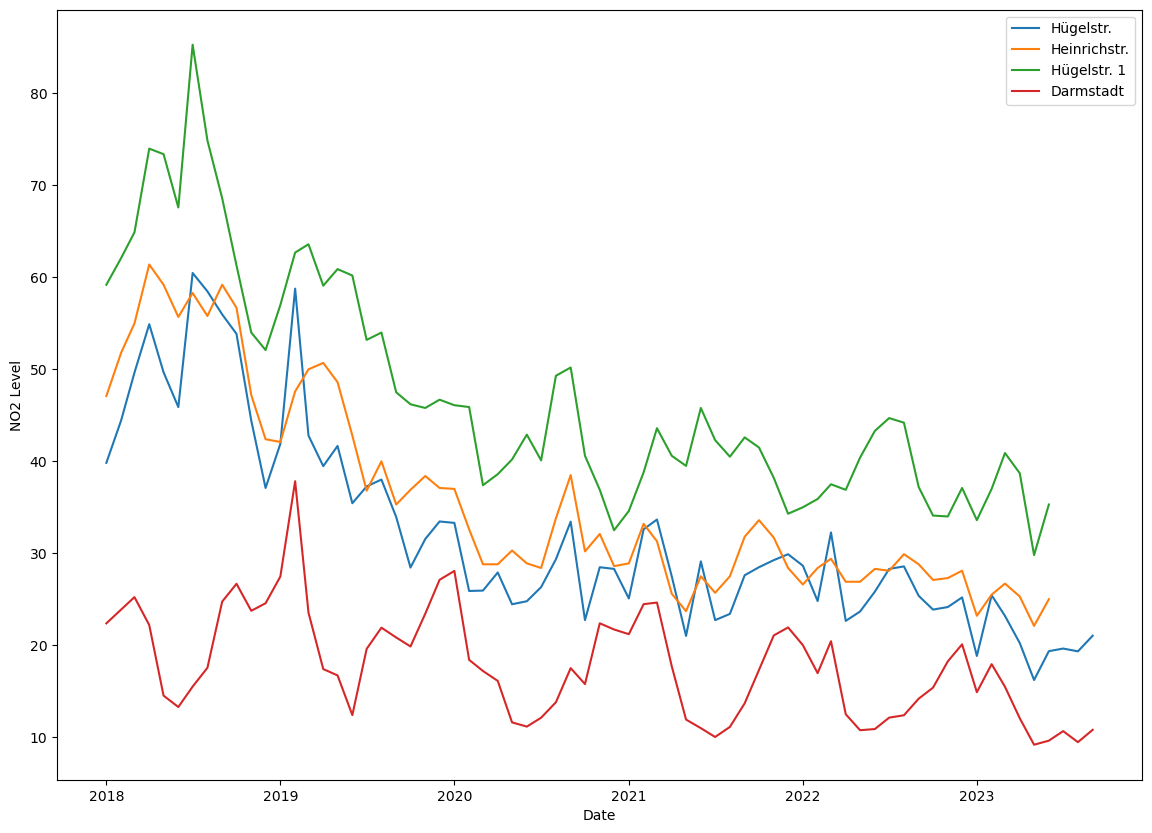

In [56]:
#plot chart
plt.figure(figsize=(14, 10))

plt.plot(huegelstr_NO2['date'], huegelstr_NO2['NO2'], label='Hügelstr.')

plt.plot(merged_data_heinrichstr['date'], merged_data_heinrichstr['NO2'], label='Heinrichstr.')

plt.plot(merged_data_huegelstr_1['date'], merged_data_huegelstr_1['NO2'], label='Hügelstr. 1')

plt.plot(darmstadt_NO2['date'], darmstadt_NO2['NO2'], label='Darmstadt')

plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.legend()

plt.show()


# PM 2,5 and PM10 concentration at Heinrichstr and Rudolf Müller Anlage

In [58]:
#get monthly average for the dfs, that are not already in monthly format
huegelstr_PM = huegelstr.groupby(huegelstr['date'].dt.to_period("M"))[['PM2,5', 'PM10']].mean().reset_index()
huegelstr_PM['date'] = huegelstr_PM['date'].dt.to_timestamp()
huegelstr_PM

darmstadt_PM = darmstadt.groupby(darmstadt['date'].dt.to_period("M"))[['PM2,5', 'PM10']].mean().reset_index()
darmstadt_PM['date'] = darmstadt_PM['date'].dt.to_timestamp()
darmstadt_PM

,date,"PM2,5",PM10
0,2018-01-01,NaN,11.041868
1,2018-02-01,NaN,21.939137
2,2018-03-01,NaN,20.139315
3,2018-04-01,NaN,16.196245
4,2018-05-01,NaN,18.790108
...,...,...,...
64,2023-05-01,8.425572,15.065410
65,2023-06-01,9.802927,19.807317
66,2023-07-01,6.267204,13.677419
67,2023-08-01,6.282863,11.433871


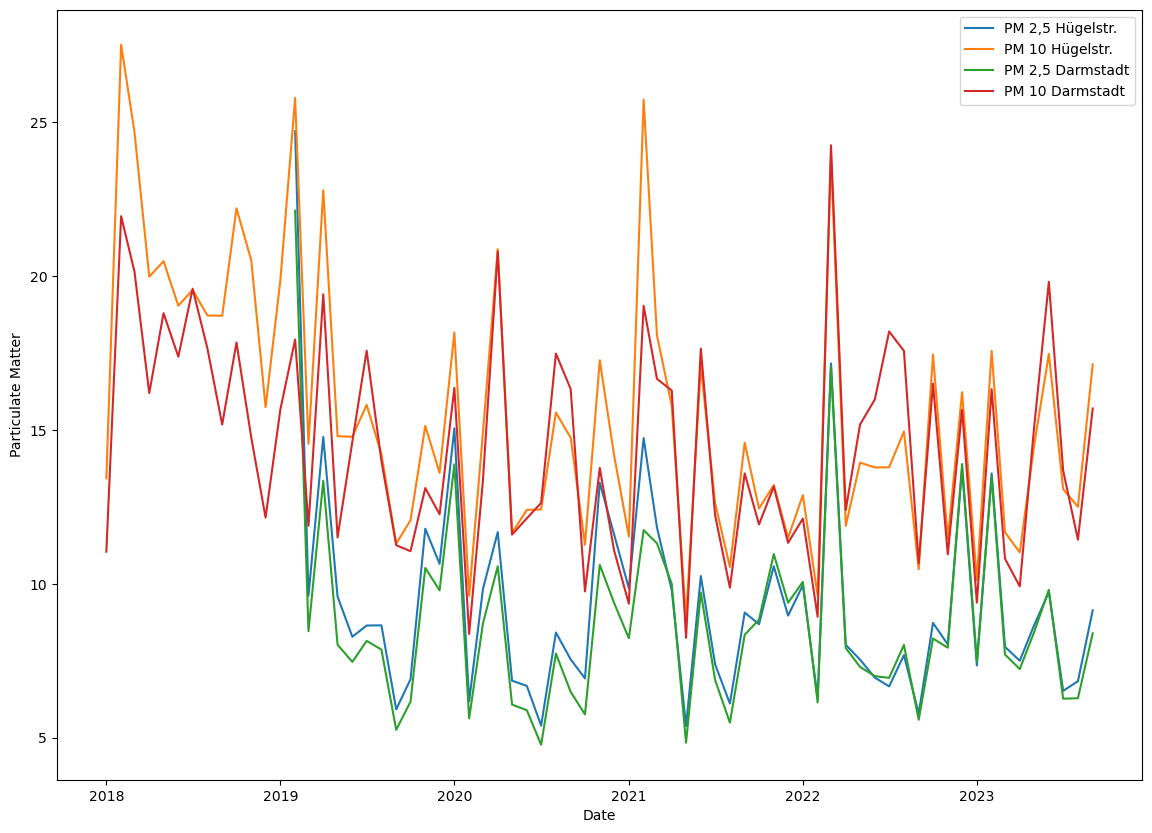

In [59]:
#plot chart
plt.figure(figsize=(14, 10))

plt.plot(huegelstr_PM['date'], huegelstr_PM['PM2,5'], label='PM 2,5 Hügelstr.')

plt.plot(huegelstr_PM['date'], huegelstr_PM['PM10'], label='PM 10 Hügelstr.')

plt.plot(darmstadt_PM['date'], darmstadt_PM['PM2,5'], label='PM 2,5 Darmstadt')

plt.plot(darmstadt_PM['date'], darmstadt_PM['PM10'], label='PM 10 Darmstadt')

plt.xlabel('Date')
plt.ylabel('Particulate Matter')
plt.legend()

plt.show()